# Intraday Momentum Strategies

Four main causes of intraday momentum: 
1. The slow diffusion, analysis, and acceptance of new information. 
2. The forced sales or purchased of assets of various type of funds. 
3. Market manipulation by HFT. 
4. The triggering of stops. 

A problem with interday momentum strategies is that the time horizon tends to be long (typically a month or longer). This presents two problems:
* Lower Sharpe and backtest statistical significance because of the infrequent independent trading signals, 
* They suffer from underperformance in the aftermath of financial crises

We will describe intraday momentum strategies. 


## Opening Gap Strategy

In [13]:
import yfinance as yf
import pandas as pd

First we load the daily OHLC of the last 10 years of natural gas futures contract for January 2024. 

In [14]:
futures_contract = 'NGF24.NYM'
period = '10y'
interval = '1d'

In [15]:
futures_data = yf.Ticker(futures_contract).history(period=period, interval=interval)
op, hi, lo, cl = futures_data['Open'], futures_data['High'], futures_data['Low'], futures_data['Close']

In [16]:
entryZscore=0.1
returns = cl.pct_change()
stdretC2C90d=returns.rolling(window=90).std().shift(1)

Generate long and short signals

In [17]:
longs = (op > hi.shift(1)) & (op > (1 + entryZscore * stdretC2C90d))
shorts = (op < lo.shift(1)) & (op < (1 - entryZscore * stdretC2C90d))

Initialize positions and set positions based on signals

In [18]:
positions = pd.Series(0, index=cl.index)
positions[longs] = 1
positions[shorts] = -1

Calculate and plot returns

<AxesSubplot: xlabel='Date'>

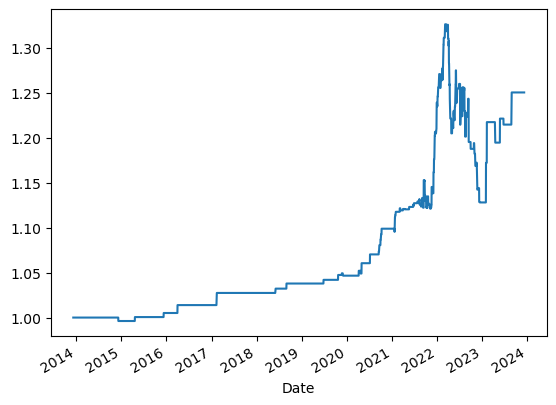

In [19]:
ret = positions * (op - cl) / op
ret.add(1).cumprod().plot()